In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [108]:
df = pd.read_csv('gariya.csv',low_memory=False)

In [109]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102329 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102191 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  float64
 12  cancellation_pol

In [111]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [112]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [113]:
df.drop_duplicates(inplace = True)


In [114]:
df.drop(['house_rules','license'],axis = 1, inplace= True)

In [115]:
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False)


In [116]:
df['price'] = df['price'].str .replace('$','', regex = False)
df['service fee'] = df['service fee'].str .replace('$','', regex = False)

In [119]:
df.rename(columns = { 
    'price':'price_$','service fee':'service_fee_$'
}, inplace = True)

In [120]:
df.dropna(inplace = True)

In [121]:
df['price_$']=df['price_$'].astype(float)
df['service_fee_$']=df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id']=df['host id'].astype(str)
df['last review']=pd.to_datetime(df['last review'])
df['Construction year']=df['Construction year'].astype(int)


In [122]:
df.loc[df['neighbourhood group']=='brookln', 'neighbourhood group'] = 'Brooklyn'

In [123]:
df=df.drop(df[df['availability 365']>500].index)

In [124]:
df.duplicated().value_counts()

False    83796
Name: count, dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83796 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83796 non-null  object        
 1   NAME                            83796 non-null  object        
 2   host id                         83796 non-null  object        
 3   host_identity_verified          83796 non-null  object        
 4   host name                       83796 non-null  object        
 5   neighbourhood group             83796 non-null  object        
 6   neighbourhood                   83796 non-null  object        
 7   lat                             83796 non-null  float64       
 8   long                            83796 non-null  float64       
 9   country                         83796 non-null  object        
 10  country code                    83796 non-null  object        
 11  instan

In [126]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83796.000000,83796.000000,83796.000000,83796.000000,83596.000000,83567.000000,83796.000000,83796.000000,83796,83796.000000,83796.000000,83796.000000,83796.000000
mean,40.727353,-73.948502,0.497721,2012.489522,626.342457,125.232436,7.436775,32.226622,2019-06-09 15:15:53.229271296,1.375596,3.278820,7.049907,141.759153
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721335,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930790,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056317,0.050338,0.499998,5.760523,331.809388,66.357813,28.122911,51.897899,NaN,1.749446,1.283724,29.568700,133.408285


In [127]:
#what are the differnt property types in the Dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44367
Private room,37664
Shared room,1655
Hotel room,110


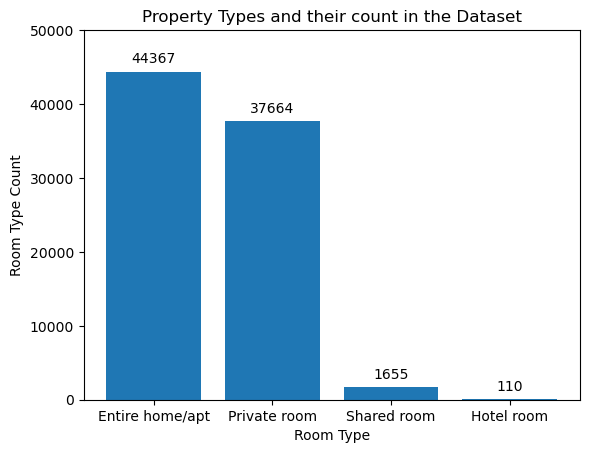

In [128]:
room_type_bar=plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"],padding=4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

In [129]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34780
Manhattan,34735
Queens,11184
Bronx,2276
Staten Island,821


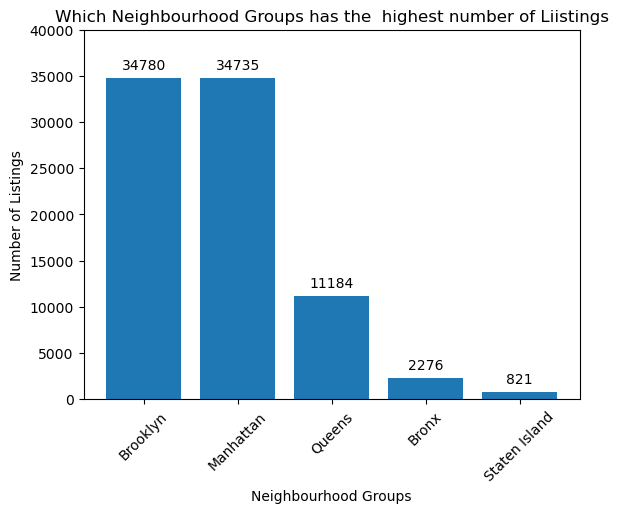

In [130]:
#which neighborhood group has thhe highes number of listings?
hood_group_bar=plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels=hood_group.loc[:,"count"],padding=4);
plt.ylim([0,40000]);
plt.xlabel('Neighbourhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which Neighbourhood Groups has the  highest number of Liistings');



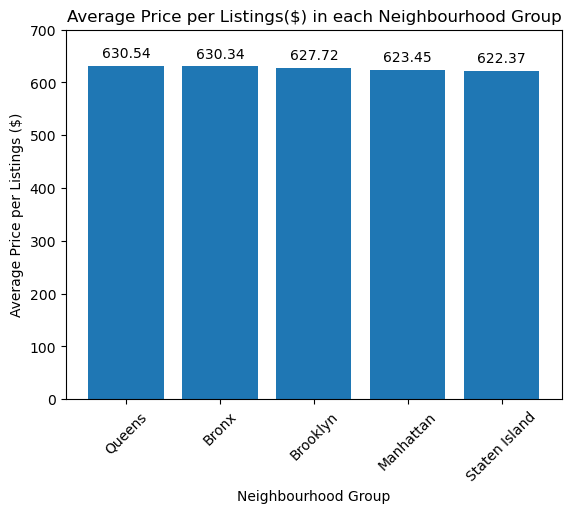

In [131]:
avg_price=df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar=plt.bar(avg_price.index, avg_price.loc[:,'price_$']);
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:,"price_$"], 2), label_type='edge',padding=4);
plt.ylim([0,700]);
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings($) in each Neighbourhood Group');

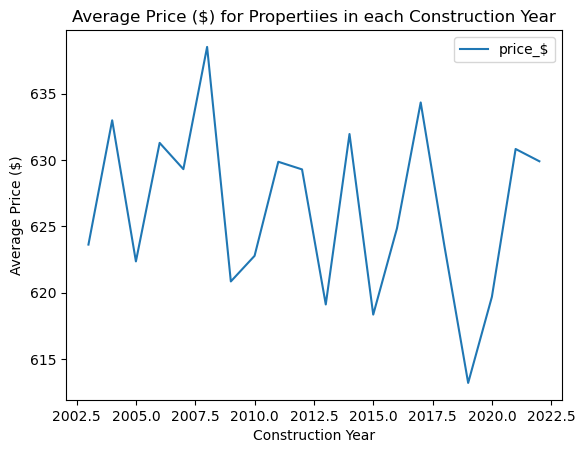

In [132]:
#Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price ($)');
plt.title('Average Price ($) for Propertiies in each Construction Year');


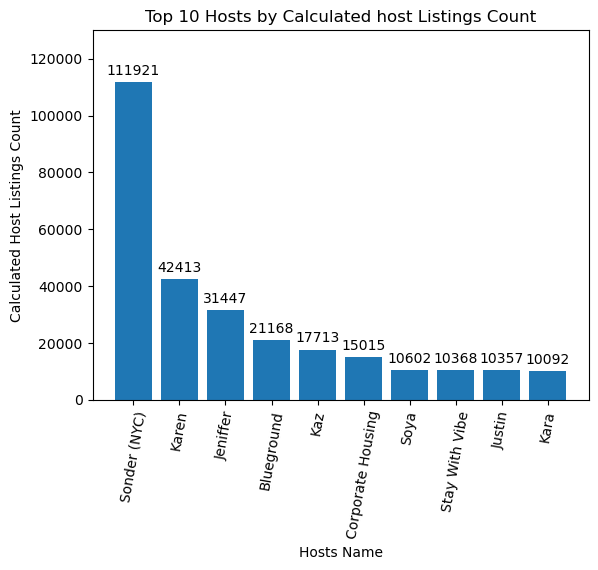

In [133]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label(hosts_bar, label=hosts.loc[:,'calculated host listings count'], label_type='edge', padding=3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim([0,130000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');



In [134]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283856
unconfirmed,3.273786


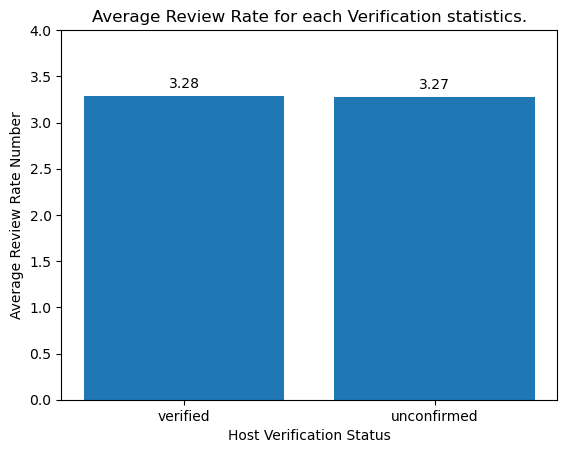

In [135]:
review_bar=plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels=round(review.loc[:,"review rate number"], 2), padding = 4);
plt.ylim([0,4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate Number');
plt.title('Average Review Rate for each Verification statistics.');


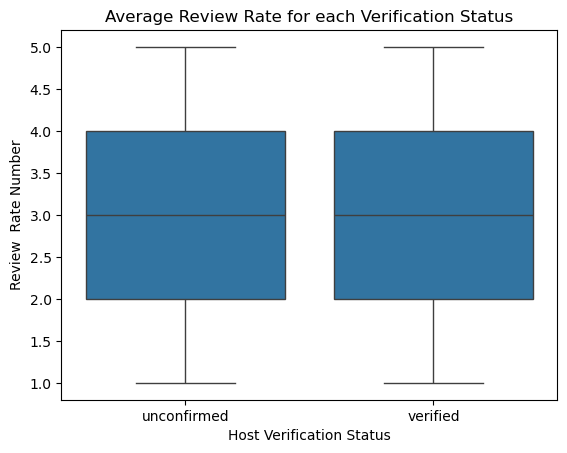

In [136]:
base_color=sns.color_palette()[0]
sns.boxplot(data=df, x="host_identity_verified", y="review rate number", color=base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review  Rate Number');
plt.title('Average Review Rate for each Verification Status');

In [137]:
#Is there a correlation between the price of a listing and its service fee?
df['price_$'].corr(df['service_fee_$'])

np.float64(0.999990908297645)

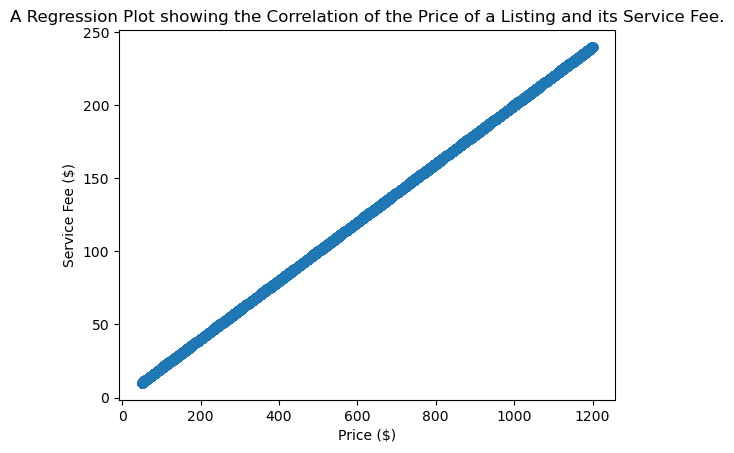

In [144]:
sns.regplot(df, x ='price_$', y = 'service_fee_$');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee.');



In [145]:
ARRN = df.groupby(['neighbourhood group','room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274774
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285628
                    Shared room                3.252976
Queens              Entire home/apt            3.347437
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

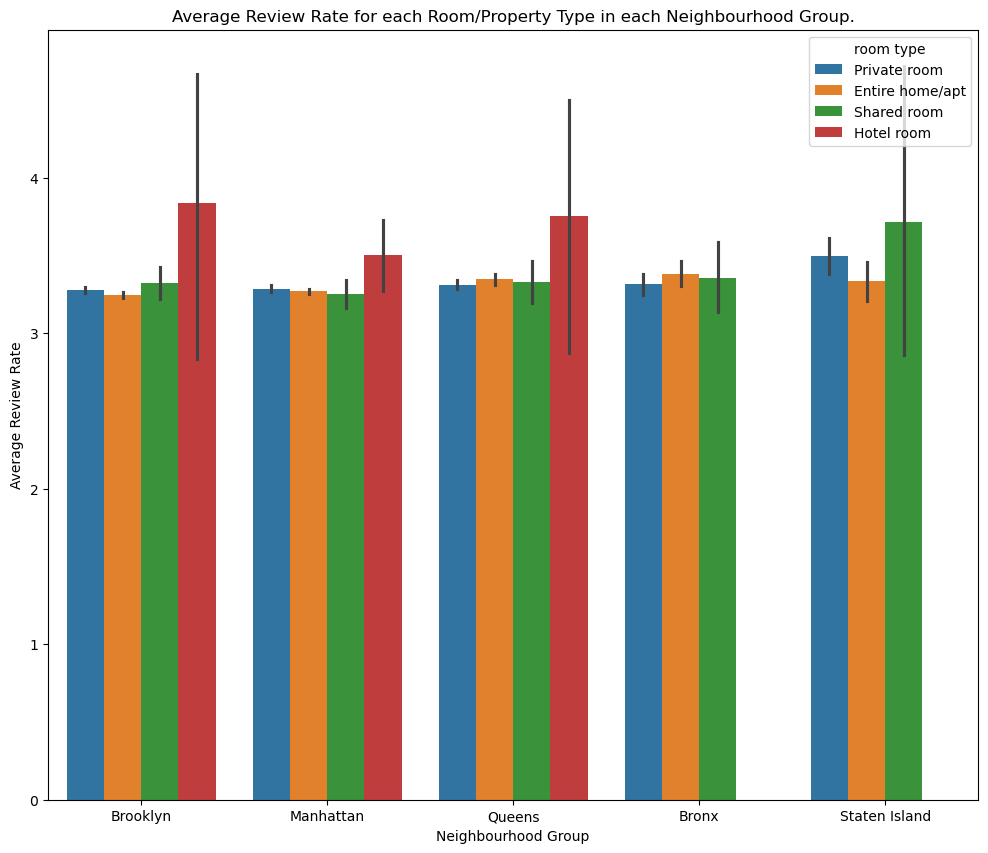

In [149]:
plt.figure(figsize=[12,10]);
sns.barplot(data=df, x='neighbourhood group' , y= 'review rate number' , hue='room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');


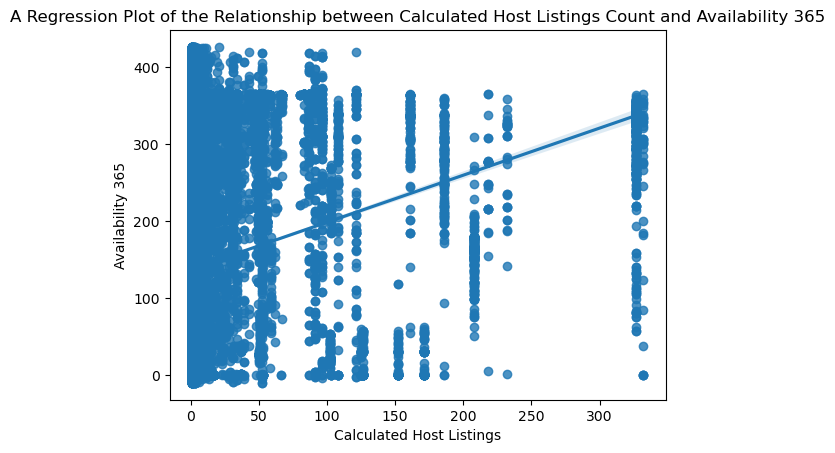

In [154]:
sns.regplot(df, x='calculated host listings count', y='availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');


In [155]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1353372562905363)